# Lecture 01 
## **Warm up Exercise**

### load packages

In [1]:
import numpy as np
from scipy import signal
from PIL import Image
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

### load image

In [2]:
# 指定图片文件路径
img_filename = './imgs/coins.png'

# 使用Pillow库打开图片，并使用上下文管理器确保图片资源被正确关闭
with Image.open(img_filename) as img:
    img.show()  # 显示图片，也可以使用 display(img) 代替
    print(img.size, img.mode)  # 打印图片的信息，包括尺寸和色彩模式
    img_g = img.convert('F')  # 将图片转换为浮点数模式
    print(img_g.size, img_g.mode)  # 打印转换后的图片信息
    img_arr = np.array(img_g)  # 将图像转换为NumPy数组


(240, 196) RGB
(240, 196) F


### Convolutions

#### 1. Construct a filter kernel used for blurring

In [3]:
# 构建一个用于模糊的滤波核
# 在这里，我们创建一个11x11的均值滤波核，用于进行图像平滑处理
mean_kernel = np.ones((11, 11)) / (11*11)
# 上述核的每个元素都设置为1/(11*11)，以确保平均滤波效果
# 该核的大小可以根据需求调整，以影响模糊程度

In [4]:
from scipy import signal

# 执行卷积操作
# 这里使用了SciPy库中的convolve2d函数进行卷积操作
# img_arr 是输入图像的NumPy数组，mean_kernel 是之前创建的均值滤波核

# 参数 'mode' 和 'boundary' 的设置会影响卷积的结果和边界处理方式

# mode='same' 表示输出的尺寸与输入图像相同，卷积结果会在图像边界内
# mode='valid' 表示输出尺寸会根据滤波核的大小而减小，卷积结果不会超出图像边界
# mode='full' 表示输出尺寸会根据滤波核的大小而增加，卷积结果会超出图像边界

# boundary='symm' 表示采用对称边界处理方式，即在卷积时考虑图像边界以外的像素值，
# 并使用图像镜像对称的方式进行卷积。这可以防止卷积结果出现边界伪影。

mean_arr = signal.convolve2d(img_arr, mean_kernel, mode='same', boundary='symm')


In [5]:
# 打印原始图像的尺寸
print('原始图像尺寸：', img.size)

# 打印经过卷积后的图像数组的形状
print('经过卷积后的图像形状：', mean_arr.shape)


原始图像尺寸： (240, 196)
经过卷积后的图像形状： (196, 240)


Text(0.5, 0, 'Convolution afterwhite')

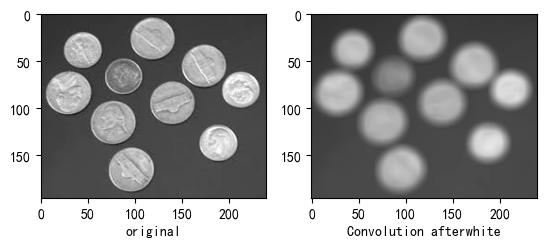

In [6]:
import matplotlib.pyplot as plt

# 创建一个包含两个子图的图像窗口
fig, axs = plt.subplots(1, 2)

# 在第一个子图中显示原始图像
axs[0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
axs[0].set_xlabel('original')

# 在第二个子图中显示经过卷积后的图像
axs[1].imshow(mean_arr, cmap='gray', vmin=0, vmax=255)
axs[1].set_xlabel('Convolution afterwhite')

# 设置子图的标签，用于说明图像内容

# 注意：上述代码假定您已经导入了Matplotlib库（import matplotlib.pyplot as plt），
# 并且已经创建了一个包含两个子图的图像窗口（fig, axs）。

# cmap='gray' 指定了灰度颜色映射，vmin 和 vmax 用于设置颜色映射的范围，
# 这里设置为0到255，确保图像以灰度形式正确显示。


#### 2. Construct a filter kernel used for sharpening

In [7]:
import numpy as np

# 创建一个锐化滤波核
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# 锐化滤波核用于增强图像中的细节和边缘特征
# 在这个核中，中心元素值较大，周围元素值较小，以增强图像中的差异
# 这种核可以用于锐化图像，突出边缘，使图像更加清晰


In [25]:
from scipy import signal

# 执行卷积操作，应用锐化滤波核
# 这里使用了SciPy库中的convolve2d函数进行卷积操作
# img_arr 是输入图像的NumPy数组，sharpen_kernel 是之前创建的锐化滤波核

# 参数 'mode' 和 'boundary' 的设置会影响卷积的结果和边界处理方式

# mode='same' 表示输出的尺寸与输入图像相同，卷积结果会在图像边界内
# mode='valid' 表示输出尺寸会根据滤波核的大小而减小，卷积结果不会超出图像边界
# mode='full' 表示输出尺寸会根据滤波核的大小而增加，卷积结果会超出图像边界

# boundary='symm' 表示采用对称边界处理方式，即在卷积时考虑图像边界以外的像素值，
# 并使用图像镜像对称的方式进行卷积。这可以防止卷积结果出现边界伪影。

sharpened_arr = signal.convolve2d(img_arr, sharpen_kernel, mode='same', boundary='symm')

Text(0.5, 0, 'Convolution afterwhite')

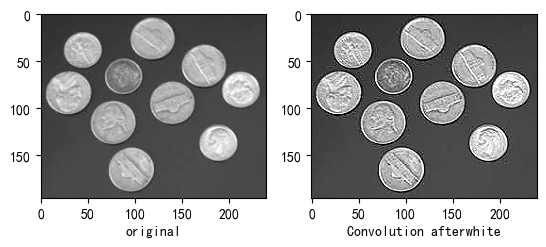

In [9]:
import matplotlib.pyplot as plt

# 创建一个包含两个子图的图像窗口
fig, axs = plt.subplots(1, 2)

# 在第一个子图中显示原始图像
axs[0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
axs[0].set_xlabel('original')

# 在第二个子图中显示经过锐化卷积后的图像
axs[1].imshow(sharpened_arr, cmap='gray', vmin=0, vmax=255)
axs[1].set_xlabel('Convolution afterwhite')

# 设置子图的标签，用于说明图像内容

# 注意：上述代码假定您已经导入了Matplotlib库（import matplotlib.pyplot as plt），
# 并且已经创建了一个包含两个子图的图像窗口（fig, axs）。

# cmap='gray' 指定了灰度颜色映射，vmin 和 vmax 用于设置颜色映射的范围，
# 这里设置为0到255，确保图像以灰度形式正确显示。


#### 3. Try some other kernels?

In [24]:
# 边缘检测：

# Sobel 算子用于检测边缘，有水平和垂直两个方向的卷积核。
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

# 模糊/平滑：

# 高斯滤波器用于图像平滑，减少噪声。
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16

# 浮雕效果：

# 浮雕滤波器可以使图像看起来像是雕刻在坚硬材料上的浮雕。
emboss_kernel = np.array([[-2, -1, 0],
                         [-1, 1, 1],
                         [0, 1, 2]])

# 轮廓增强：

# Prewitt 算子用于增强图像中的轮廓。
prewitt_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])


In [26]:
# 1. Sobel 算子（边缘检测）

# 使用Sobel算子进行水平边缘检测
sobel_x_edge = signal.convolve2d(img_arr, sobel_x, mode='same', boundary='symm')

# 使用Sobel算子进行垂直边缘检测
sobel_y_edge = signal.convolve2d(img_arr, sobel_y, mode='same', boundary='symm')

# 2. 高斯滤波器（模糊/平滑）

# 使用高斯滤波器进行图像平滑
gaussian_blur = signal.convolve2d(img_arr, gaussian_kernel, mode='same', boundary='symm')

# 3. 浮雕滤波器

# 使用浮雕滤波器创建浮雕效果
emboss_effect = signal.convolve2d(img_arr, emboss_kernel, mode='same', boundary='symm')

# 4. Prewitt 算子（轮廓增强）

# 使用Prewitt算子进行水平边缘增强
prewitt_x_edge = signal.convolve2d(img_arr, prewitt_x, mode='same', boundary='symm')

# 使用Prewitt算子进行垂直边缘增强
prewitt_y_edge = signal.convolve2d(img_arr, prewitt_y, mode='same', boundary='symm')


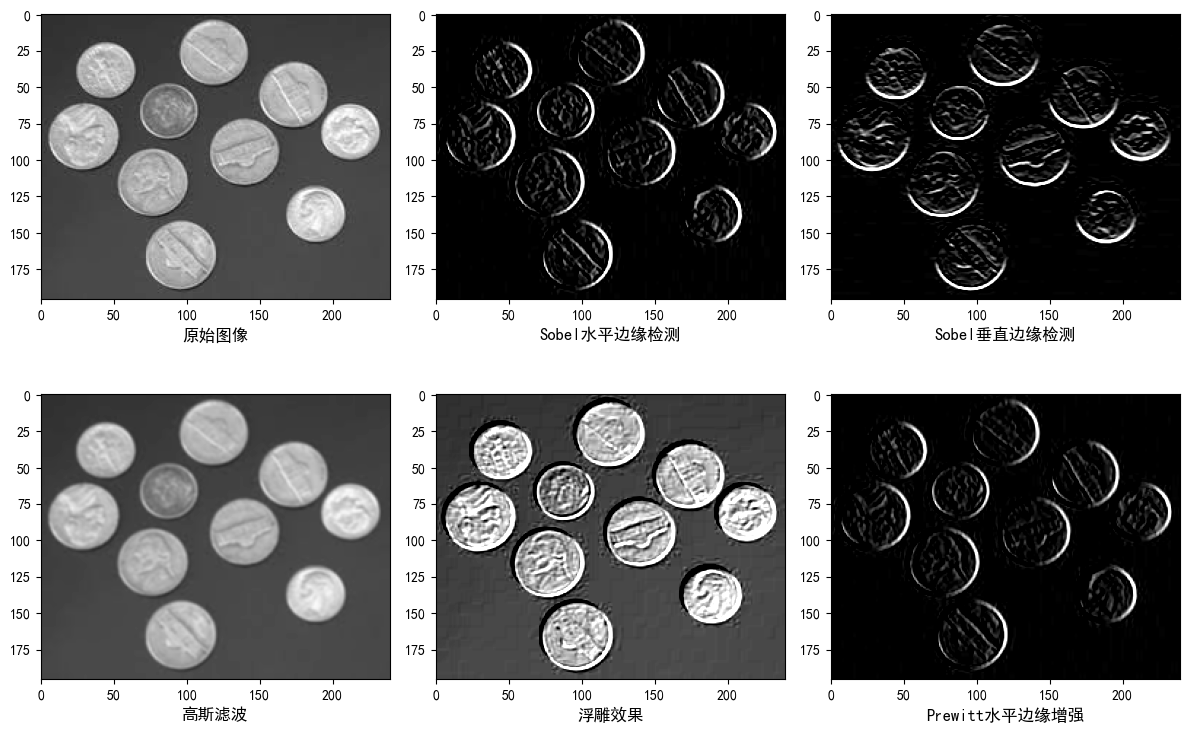

In [33]:
# 创建一个包含多个子图的图像窗口
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# 显示原始图像
axs[0, 0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_xlabel('原始图像', fontsize=12)

# 显示Sobel边缘检测结果
axs[0, 1].imshow(sobel_x_edge, cmap='gray', vmin=0, vmax=255)
axs[0, 1].set_xlabel('Sobel水平边缘检测', fontsize=12)

axs[0, 2].imshow(sobel_y_edge, cmap='gray', vmin=0, vmax=255)
axs[0, 2].set_xlabel('Sobel垂直边缘检测', fontsize=12)

# 显示高斯滤波结果
axs[1, 0].imshow(gaussian_blur, cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_xlabel('高斯滤波', fontsize=12)

# 显示浮雕效果
axs[1, 1].imshow(emboss_effect, cmap='gray', vmin=0, vmax=255)
axs[1, 1].set_xlabel('浮雕效果', fontsize=12)

# 显示Prewitt边缘增强结果
axs[1, 2].imshow(prewitt_x_edge, cmap='gray', vmin=0, vmax=255)
axs[1, 2].set_xlabel('Prewitt水平边缘增强', fontsize=12)

# 设置子图之间的间距
plt.tight_layout()

# 显示图像比较结果
plt.show()

## **Task 1**

#### Thresholding
Use the operators >, <, >=, <= to threshold the image using an arbitrary threshold. 

That is, divide the image pixels into two classes, the ones below and the ones above the threshold, 

and give them different values (e.g. 0 and 255)

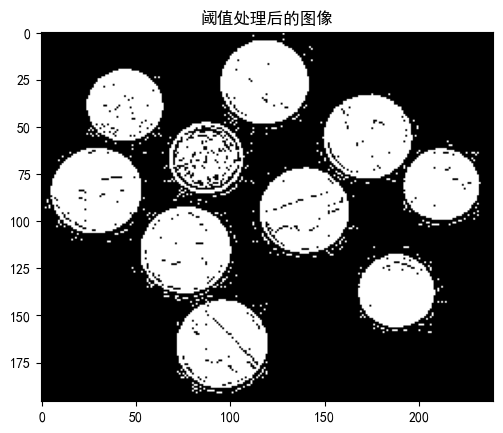

In [11]:
# 假设您已经有了一个经过卷积处理后的图像 sharpened_arr

# 指定阈值
threshold = 100  # 请根据您的需求设置阈值

# 使用比较运算符进行阈值处理
# 将高于阈值的像素设置为255，低于阈值的像素设置为0
thresholded_image = (sharpened_arr >= threshold) * 255

# thresholded_image 中的每个像素值将为0（黑色）或255（白色），取决于它是否高于阈值

# 显示阈值处理后的图像
plt.imshow(thresholded_image, cmap='gray', vmin=0, vmax=255)
plt.title('阈值处理后的图像')
plt.show()


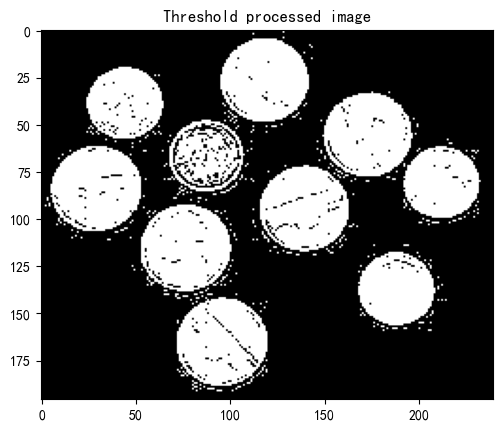

In [12]:
# 显示阈值处理后的图像
plt.imshow(thresholded_image, cmap='gray')
plt.title('Threshold processed image')

# 将图像像素类型转换为整数类型
thresholded_image = thresholded_image.astype(int)


### **Think:** why the segmentation can be so easily implemented simply by thresholding? 
try plot the histogram of the image, you will understand.

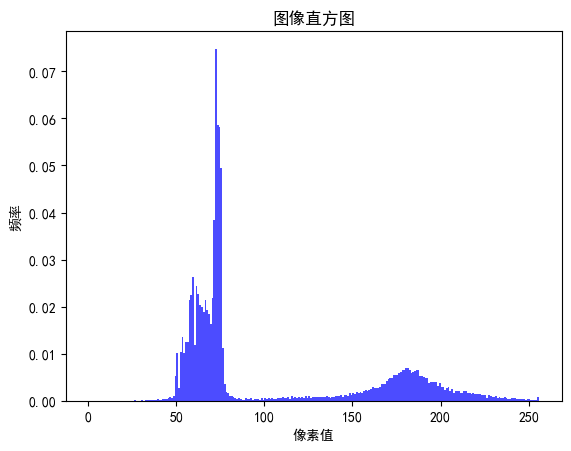

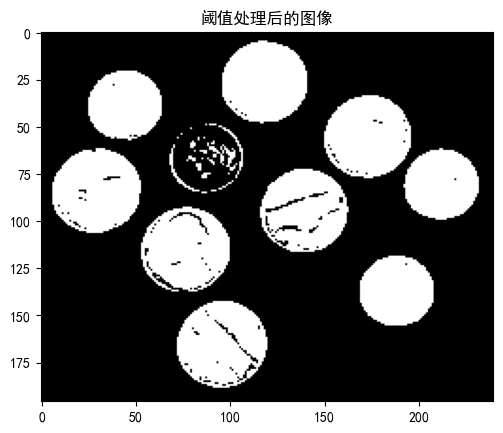

In [13]:
import matplotlib.pyplot as plt

# 绘制图像的直方图
plt.hist(img_arr.flatten(), bins=256, range=(0, 256), density=True, color='b', alpha=0.7)
plt.xlabel('像素值')
plt.ylabel('频率')
plt.title('图像直方图')

# 选择阈值，例如根据直方图峰值或手动调整
threshold = 150  # 请根据直方图分布调整阈值

# 使用选择的阈值进行图像分割
segmented_image = (img_arr >= threshold) * 255

# 显示阈值处理后的图像
plt.figure()
plt.imshow(segmented_image, cmap='gray')
plt.title('阈值处理后的图像')
plt.show()


## **Task 2**

### Use the methods in Pillow to implement 
https://pillow.readthedocs.io/en/stable/handbook/index.html
1. vertically flipped
2. horizontally flipped
3. rotated by 90 degrees

In [14]:
# 图像文件路径
img_filename = './imgs/windows-xp.jpg'

# 使用Pillow库打开图像文件，并使用上下文管理器确保图像资源被正确关闭
with Image.open(img_filename) as img_obj:
    img_obj.show()  # 显示图像，您也可以使用 display(img) 代替


In [15]:
# 图像文件路径
img_filename = './imgs/windows-xp.jpg'

# 使用Pillow库打开图像文件，并使用上下文管理器确保图像资源被正确关闭
with Image.open(img_filename) as img_obj:
    # 将图像逆时针旋转90度
    flip1 = img_obj.rotate(90)
    flip1.show()  # 显示旋转后的图像


In [16]:
# 使用Pillow库打开图像文件，并使用上下文管理器确保图像资源被正确关闭
with Image.open(img_filename) as img_obj:
    # 进行垂直翻转
    verti_flipped = img_obj.transpose(Image.FLIP_TOP_BOTTOM)
    verti_flipped.show()  # 显示翻转后的图像

In [17]:
# 2. horizontally flipped
hori_flipped = img_obj.transpose(Image.FLIP_LEFT_RIGHT)
hori_flipped.show()

In [18]:
# 3. rotated by 90 degrees
rotated90 = img_obj.transpose(Image.ROTATE_90)
rotated90.show()

## **Task 3**
#### Implement the **function swap_RB()** where:
+ In the returned image, the red and blue channels of the input image have to be swapped.
+ You can carry out the operation using arraying indexing or with loops

In [19]:
from PIL import Image
import numpy as np

def swap_RB(filename):
    # 加载并显示图像
    with Image.open(filename) as img_obj:
        img_obj.show()  # 显示图像，您也可以使用 display(img)
        print(img_obj.mode)  # 打印图像的模式（通道顺序）
    img_arr = np.array(img_obj)
    print(img_arr.shape)  # 打印图像数组的形状

    # 创建一个与原始图像相同大小的新图像
    swap_RB_img = np.zeros(img_arr.shape)

    # 交换红色通道（R）和蓝色通道（B）
    swap_RB_img[:, :, 0] = img_arr[:, :, 2]  # 将红色通道替换为原始图像的蓝色通道
    swap_RB_img[:, :, 1] = img_arr[:, :, 1]  # 保持绿色通道不变
    swap_RB_img[:, :, 2] = img_arr[:, :, 0]  # 将蓝色通道替换为原始图像的红色通道

    # 创建包含交换后图像数据的新Pillow图像对象
    img_swap = Image.fromarray(np.uint8(swap_RB_img))
    img_swap.show()  # 显示交换通道后的图像

# 使用函数来处理图像
swap_RB('./imgs/windows-xp.jpg')  # 请提供您自己的图像文件路径


RGB
(720, 1200, 3)


In [20]:
# test the function
img_filename = './imgs/windows-xp.jpg'
swap_RB(img_filename)

RGB
(720, 1200, 3)


In [21]:
img_filename = './imgs/RGB.jpg'
swap_RB(img_filename)

RGB
(595, 631, 3)
